In [ ]:
# Importing Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# plotting
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
df = pd.read_csv('mental_health_tech.csv', index_col=0)
df.head(5)


,Self Employed,Total Employees,Tech/No Tech,MH Benefits,Awareness of Company MH Care,Formal MH Discussion,MH Resources,Anonymity,Medical Leave,MH Negative Impact,...,Sharing w/ Family/Friends,Prev Observed Unsupportive Response,Less Likely to Reveal,MH Family History,Sought Treatment,Age,Gender,Country,State,Remote
0,0,3,1.0,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,...,Somewhat open,No,NaN,No,0,4,1.0,2,0,Sometimes
1,0,2,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,...,Somewhat open,No,NaN,Yes,1,3,1.0,1,2,Never
2,0,2,1.0,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,...,Somewhat open,Maybe/Not sure,Yes,No,1,4,1.0,2,0,Always
4,0,2,0.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,...,Somewhat open,"Yes, I experienced",Yes,Yes,1,4,2.0,1,2,Sometimes
5,0,6,1.0,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,...,Somewhat open,"Yes, I experienced",No,No,1,4,1.0,2,0,Sometimes


In [ ]:
def medical_leave_difficulty(row):
    if 'difficult' in row['Medical Leave']:
        return 1
    else:
        return 0

df['Medical Leave'] = df.apply(lambda row:medical_leave_difficulty(row), axis=1)

In [ ]:
df = df[['Age', 'Gender', 'MH Family History', 'Sought Treatment', 'Prev Awareness of Company MH Care', "Remote", "Country", "State", "Tech/No Tech", "Total Employees", "MH Benefits", "MH Resources", "Medical Leave"]]
df

,Age,Gender,MH Family History,Sought Treatment,Prev Awareness of Company MH Care,Remote,Country,State,Tech/No Tech,Total Employees,MH Benefits,MH Resources,Medical Leave
0,4,1.0,No,0,N/A (not currently aware),Sometimes,2,0,1.0,3,Not eligible for coverage / N/A,No,0
1,3,1.0,Yes,1,I was aware of some,Never,1,2,1.0,2,No,Yes,0
2,4,1.0,No,1,N/A (not currently aware),Always,2,0,1.0,2,No,No,1
4,4,2.0,Yes,1,N/A (not currently aware),Sometimes,1,2,0.0,2,Yes,No,1
5,4,1.0,No,1,"Yes, I was aware of all of them",Sometimes,2,0,1.0,6,Yes,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,3,2.0,I don't know,1,N/A (not currently aware),Sometimes,3,0,1.0,4,I don't know,I don't know,0
1427,4,2.0,Yes,1,I was aware of some,Always,1,2,1.0,5,Yes,No,0
1430,5,1.0,Yes,1,I was aware of some,Sometimes,1,3,1.0,4,Yes,Yes,1
1431,3,2.0,Yes,0,N/A (not currently aware),Sometimes,1,2,0.0,4,I don't know,Yes,1


In [ ]:
# Construct data frame that shows number of unique values for each column
d = {'Column Name': df.columns, 'Unique Values': df.nunique()}
unique_vals = pd.DataFrame(data=d).reset_index()[['Column Name', 'Unique Values']].sort_values(by='Unique Values', ascending=False)

# Selecting only column names that have a valid number of unique values for dummy variable transformation (filter out binary and large numbers of unique values)
valid_dummy = unique_vals[(unique_vals['Unique Values']!=2) & (unique_vals['Unique Values']!=53) & (unique_vals['Unique Values']!=48)]
dummy_list = valid_dummy['Column Name'].values
dummy_list

df = pd.get_dummies(df, columns=dummy_list)
df.head()

,Sought Treatment,Tech/No Tech,Medical Leave,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,Country_7,...,Gender_3.0,MH Family History_I don't know,MH Family History_No,MH Family History_Yes,Remote_Always,Remote_Never,Remote_Sometimes,MH Resources_I don't know,MH Resources_No,MH Resources_Yes
0,0,1.0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,1,1.0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
2,1,1.0,1,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4,1,0.0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
5,1,1.0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1


In [ ]:
y_train = df['Sought Treatment']
x_train = df.drop(['Sought Treatment'], axis=1)
df.head(5)
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.30)
y_train

0       0
1       1
2       1
4       1
5       1
       ..
1426    1
1427    1
1430    1
1431    0
1432    0
Name: Sought Treatment, Length: 1143, dtype: int64

In [ ]:
clf_NN = MLPClassifier(hidden_layer_sizes=(15,20,15), activation = "relu", max_iter=1000,
                        solver='adam', verbose=1, random_state=42)

clf_NN.fit(X_train, Y_train)

print(accuracy_score(clf_NN.predict(X_val), Y_val))

Iteration 1, loss = 0.72002349
Iteration 2, loss = 0.70353510
Iteration 3, loss = 0.68954098
Iteration 4, loss = 0.67974559
Iteration 5, loss = 0.66998402
Iteration 6, loss = 0.66390734
Iteration 7, loss = 0.65826336
Iteration 8, loss = 0.65347398
Iteration 9, loss = 0.64871604
Iteration 10, loss = 0.64339665
Iteration 11, loss = 0.63774415
Iteration 12, loss = 0.63200690
Iteration 13, loss = 0.62554060
Iteration 14, loss = 0.61909695
Iteration 15, loss = 0.61262124
Iteration 16, loss = 0.60660427
Iteration 17, loss = 0.60064588
Iteration 18, loss = 0.59440913
Iteration 19, loss = 0.58816153
Iteration 20, loss = 0.58248950
Iteration 21, loss = 0.57772382
Iteration 22, loss = 0.57345653
Iteration 23, loss = 0.56817442
Iteration 24, loss = 0.56445207
Iteration 25, loss = 0.56065294
Iteration 26, loss = 0.55740544
Iteration 27, loss = 0.55428713
Iteration 28, loss = 0.55198870
Iteration 29, loss = 0.54950368
Iteration 30, loss = 0.54704262
Iteration 31, loss = 0.54668118
Iteration 32, los

In [ ]:
clf_DT = DecisionTreeClassifier(max_depth=10)
clf_DT.fit(X_train, Y_train)
print(accuracy_score(clf_DT.predict(X_train), Y_train)) #without validation
print(accuracy_score(clf_DT.predict(X_val), Y_val))

0.8925
0.6705539358600583


[[ 89  63]
 [ 60 131]]


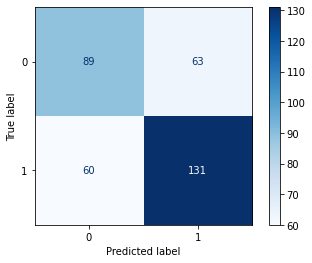

In [ ]:
CM = confusion_matrix(Y_val, clf_NN.predict(X_val))
print(CM)

plot_confusion_matrix(clf_NN, X_val, Y_val, cmap=plt.cm.Blues)
plt.show()

In [ ]:
TP = CM[1][1]
TN = CM[0][0]
FP = CM[0][1]
FN = CM[1][0]

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

True Positives: 131
True Negatives: 89
False Positives: 63
False Negatives: 60


In [ ]:
P = TP + FP
N = TN + FN

accuracy = (TP + TN) / (P + N)
error_rate = (FP + FN) / (P + N)
recall = TP / P
specificity = TN / N
precision = TP / (TP + FP)
F_score = (2 * precision * recall) / (precision + recall)
FNR = FN / (FN + TP)

measures = ["Accuracy", "Error / Misclassification Rate", "Recall / Sensitivity (True Positive Rate)", "Specificity (True Negative Rate)", "Precision", "F/F1/F-score", "False Negative Rate"]
vals = [accuracy, error_rate, recall, specificity, precision, F_score, FNR]

d = {"Measures": measures, "Values": vals}

CM_df = pd.DataFrame(data = d)
CM_df

,Measures,Values
0,Accuracy,0.641399
1,Error / Misclassification Rate,0.358601
2,Recall / Sensitivity (True Positive Rate),0.675258
3,Specificity (True Negative Rate),0.597315
4,Precision,0.675258
5,F/F1/F-score,0.675258
6,False Negative Rate,0.314136


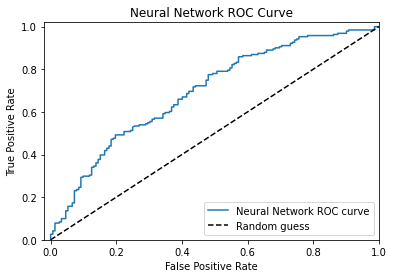

In [ ]:
y_pred_prob = clf_NN.predict_proba(X_val)[:,1]

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

fpr, tpr, thresholds = roc_curve(Y_val, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='Neural Network ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('Neural Network ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=387b3f34-ad6b-4fed-8016-3e4e46161261' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>